In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
dataset_folder = '/content/drive/MyDrive/Colab Notebooks/Data_Modelling/'
df = pd.read_csv(dataset_folder+'china_water_pollution_data.csv') # Run in Google Colab
# df = pd.read_csv('./china_water_pollution.csv') # If run in local
df.head()


,Province,City,Monitoring_Station,Latitude,Longitude,Date,Water_Temperature_C,pH,Dissolved_Oxygen_mg_L,Conductivity_uS_cm,...,Total_Nitrogen_mg_L,COD_mg_L,BOD_mg_L,Heavy_Metals_Pb_ug_L,Heavy_Metals_Cd_ug_L,Heavy_Metals_Hg_ug_L,Coliform_Count_CFU_100mL,Water_Quality_Index,Pollution_Level,Remarks
0,Zhejiang,Ningbo,Ningbo_Station_2,25.523836,122.622036,2023-06-01,22.48,6.93,9.30,652.30,...,2.71,15.38,1.39,6.90,0.66,0.02,87,36.64,Very Poor,High pollution spike detected
1,Sichuan,Mianyang,Mianyang_Station_1,32.243099,112.888760,2023-03-05,27.33,6.89,8.14,357.53,...,3.15,16.82,2.98,4.68,0.39,0.10,116,66.25,Excellent,High pollution spike detected
2,Zhejiang,Ningbo,Ningbo_Station_8,29.996179,124.744859,2023-07-13,21.04,6.02,5.34,519.69,...,3.39,17.31,2.65,3.24,0.27,0.11,110,98.69,Poor,High pollution spike detected
3,Beijing,Beijing,Beijing_Station_10,29.976437,118.274846,2023-02-17,16.62,7.31,10.06,593.13,...,2.91,17.95,5.18,3.20,0.67,0.11,99,71.32,Poor,Monitoring recommended
4,Sichuan,Chengdu,Chengdu_Station_1,43.524720,121.666111,2023-03-06,21.81,7.77,7.93,656.46,...,3.45,20.10,3.47,2.01,0.34,0.14,82,16.12,Excellent,NaN


# Initial Data Inspection

In [3]:
# Check rows and columns
df.shape

(3000, 25)

In [4]:
# Check data type on column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province                  3000 non-null   object 
 1   City                      3000 non-null   object 
 2   Monitoring_Station        3000 non-null   object 
 3   Latitude                  3000 non-null   float64
 4   Longitude                 3000 non-null   float64
 5   Date                      3000 non-null   object 
 6   Water_Temperature_C       3000 non-null   float64
 7   pH                        3000 non-null   float64
 8   Dissolved_Oxygen_mg_L     3000 non-null   float64
 9   Conductivity_uS_cm        3000 non-null   float64
 10  Turbidity_NTU             3000 non-null   float64
 11  Nitrate_mg_L              3000 non-null   float64
 12  Nitrite_mg_L              3000 non-null   float64
 13  Ammonia_N_mg_L            3000 non-null   float64
 14  Total_Ph

In [5]:
# Check null value
print("\nCheck null value:")
print(df.isnull().sum())


Check null value:
Province                      0
City                          0
Monitoring_Station            0
Latitude                      0
Longitude                     0
Date                          0
Water_Temperature_C           0
pH                            0
Dissolved_Oxygen_mg_L         0
Conductivity_uS_cm            0
Turbidity_NTU                 0
Nitrate_mg_L                  0
Nitrite_mg_L                  0
Ammonia_N_mg_L                0
Total_Phosphorus_mg_L         0
Total_Nitrogen_mg_L           0
COD_mg_L                      0
BOD_mg_L                      0
Heavy_Metals_Pb_ug_L          0
Heavy_Metals_Cd_ug_L          0
Heavy_Metals_Hg_ug_L          0
Coliform_Count_CFU_100mL      0
Water_Quality_Index           0
Pollution_Level               0
Remarks                     752
dtype: int64


In [6]:
# Check duplicated data
df.duplicated().sum()

np.int64(0)

# Dscriptive Statistics

In [7]:
df.describe().round(2)

,Latitude,Longitude,Water_Temperature_C,pH,Dissolved_Oxygen_mg_L,Conductivity_uS_cm,Turbidity_NTU,Nitrate_mg_L,Nitrite_mg_L,Ammonia_N_mg_L,Total_Phosphorus_mg_L,Total_Nitrogen_mg_L,COD_mg_L,BOD_mg_L,Heavy_Metals_Pb_ug_L,Heavy_Metals_Cd_ug_L,Heavy_Metals_Hg_ug_L,Coliform_Count_CFU_100mL,Water_Quality_Index
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,32.30,112.55,20.05,7.03,8.01,496.56,4.95,1.98,0.02,0.50,0.10,3.01,19.99,4.01,4.98,0.50,0.10,100.00,50.26
std,7.22,7.24,4.92,0.50,1.97,98.87,4.91,0.51,0.01,0.20,0.05,0.50,5.01,1.01,2.02,0.20,0.05,9.99,29.11
min,20.01,100.02,3.39,5.34,1.47,136.85,0.00,0.23,-0.02,-0.31,-0.09,1.27,2.09,0.68,-2.94,-0.12,-0.07,69.00,0.00
25%,25.99,106.26,16.71,6.70,6.66,430.24,1.43,1.63,0.01,0.36,0.07,2.66,16.59,3.31,3.62,0.37,0.07,93.00,24.60
50%,32.29,112.44,19.98,7.02,8.03,496.32,3.44,1.98,0.02,0.50,0.10,3.01,19.94,4.03,4.99,0.50,0.10,100.00,50.60
75%,38.53,118.96,23.31,7.36,9.35,561.28,6.93,2.32,0.03,0.64,0.14,3.34,23.36,4.71,6.33,0.63,0.13,107.00,75.10
max,45.00,125.00,36.77,8.76,14.49,842.89,47.48,3.84,0.05,1.13,0.27,4.70,37.78,6.97,12.61,1.30,0.24,136.00,99.95


# Univariate Analysis

## Show Distribution

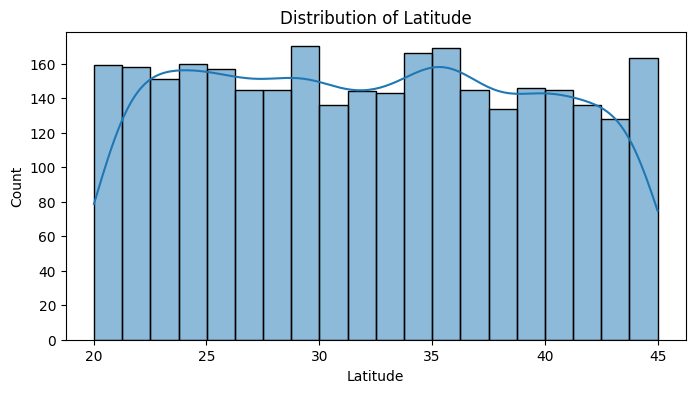

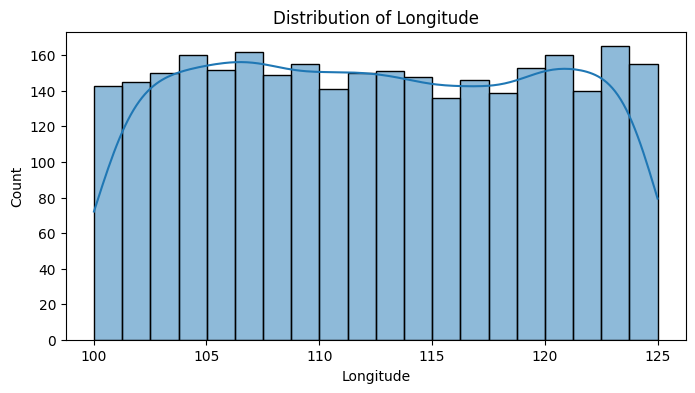

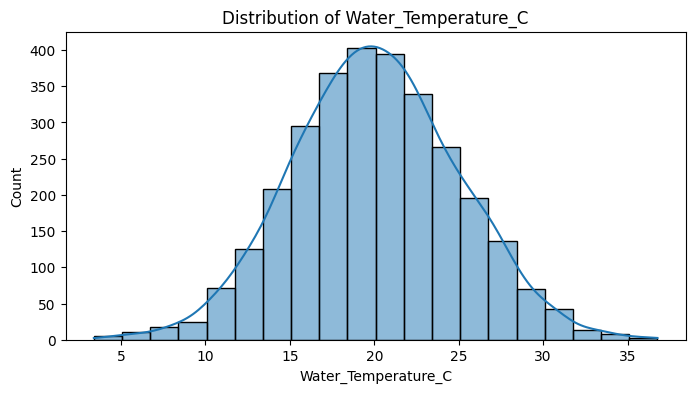

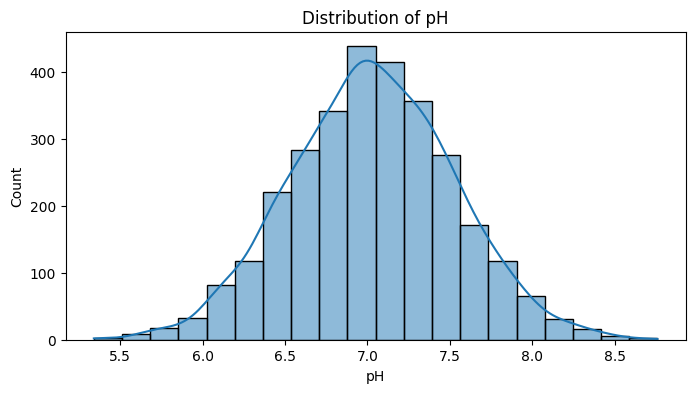

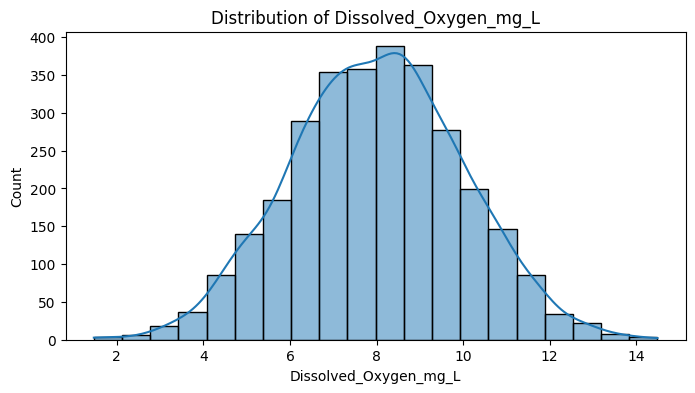

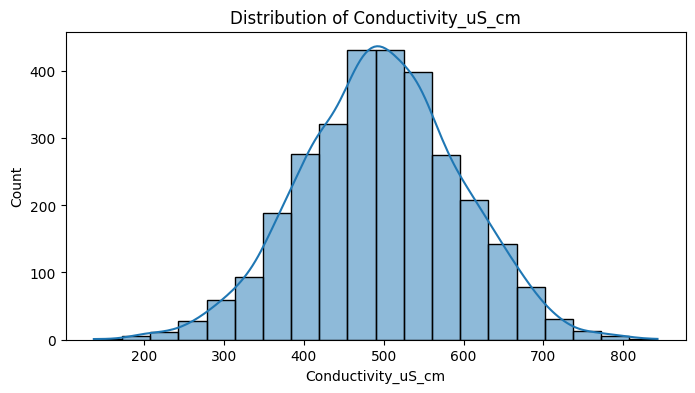

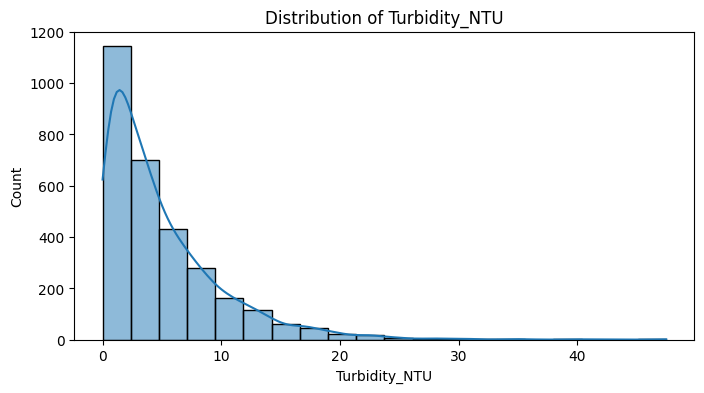

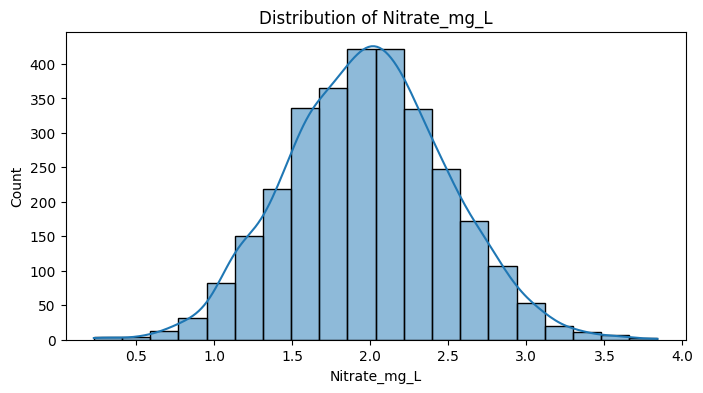

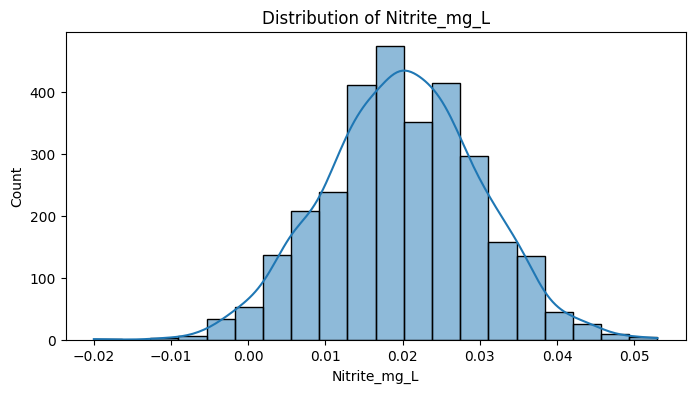

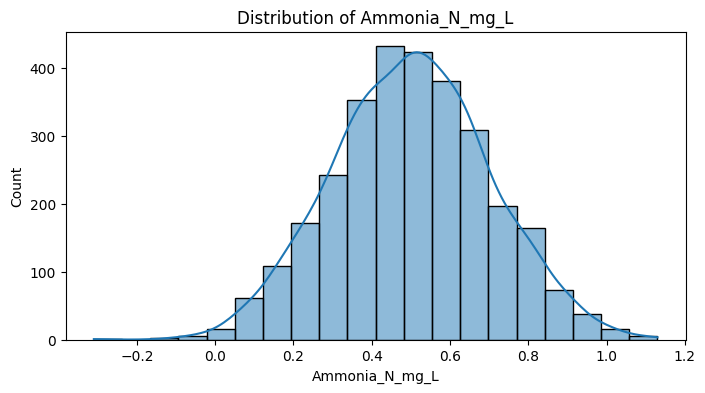

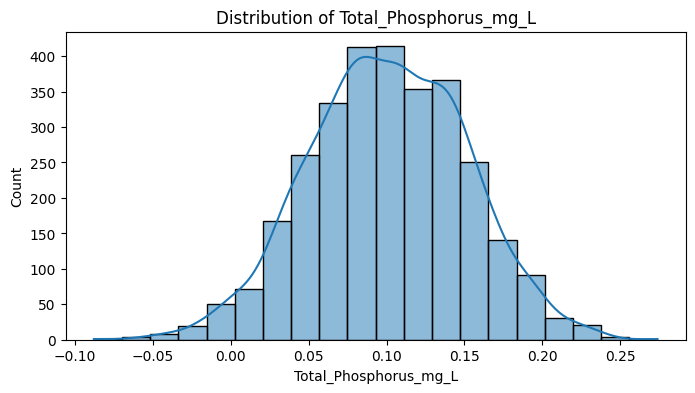

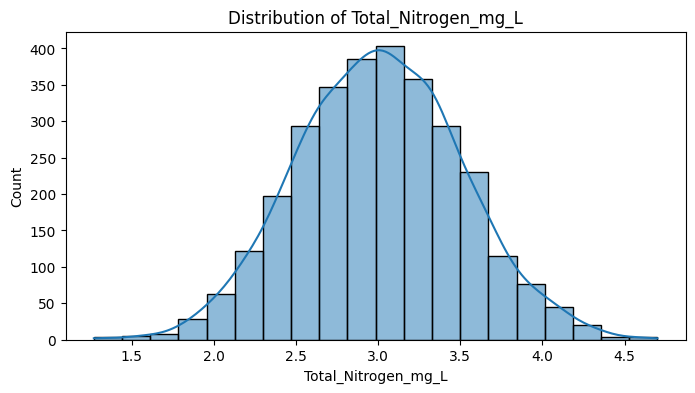

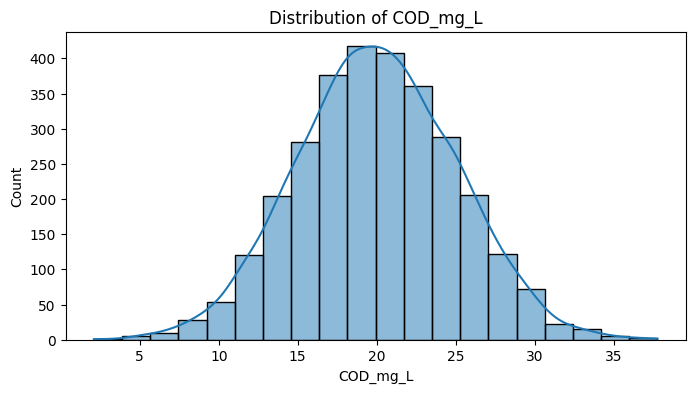

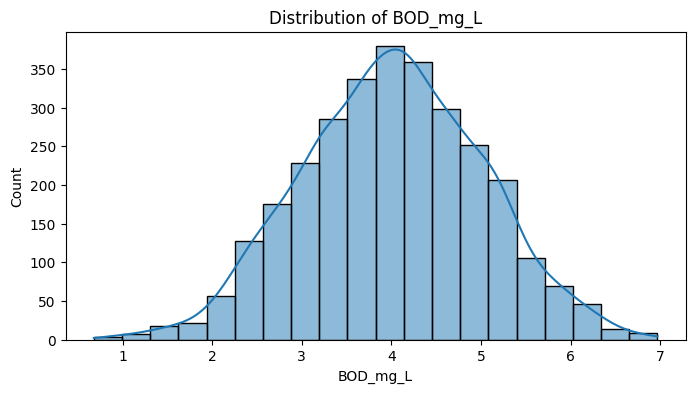

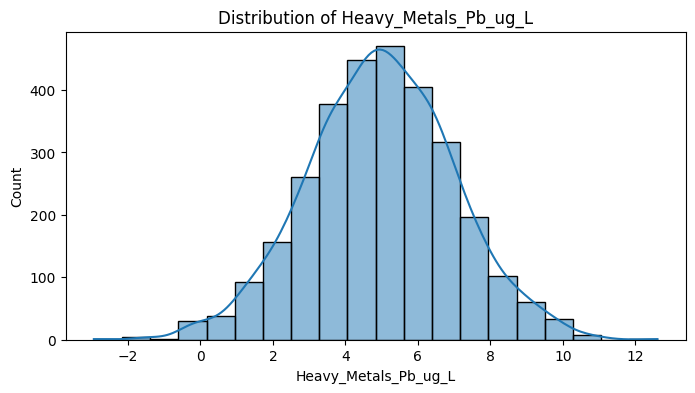

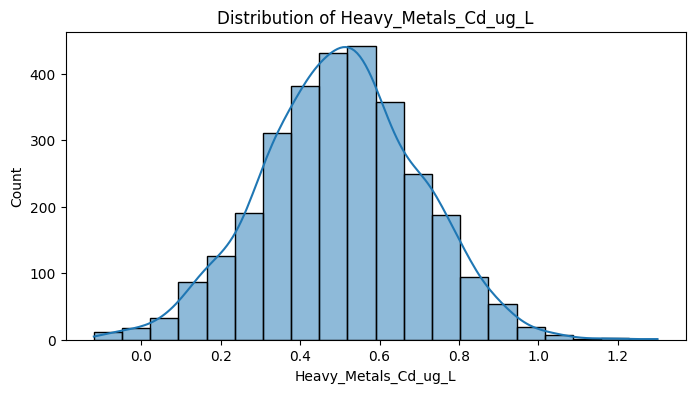

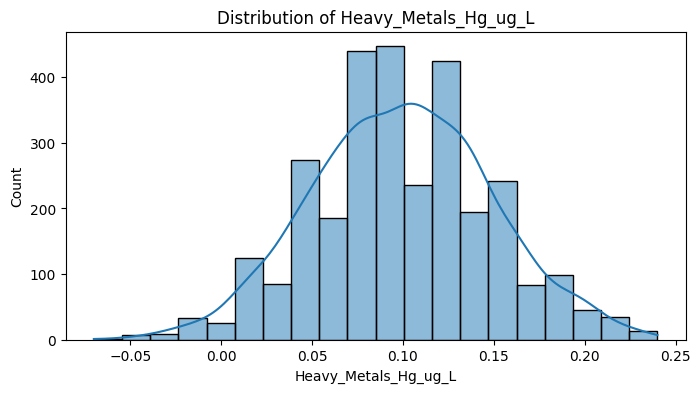

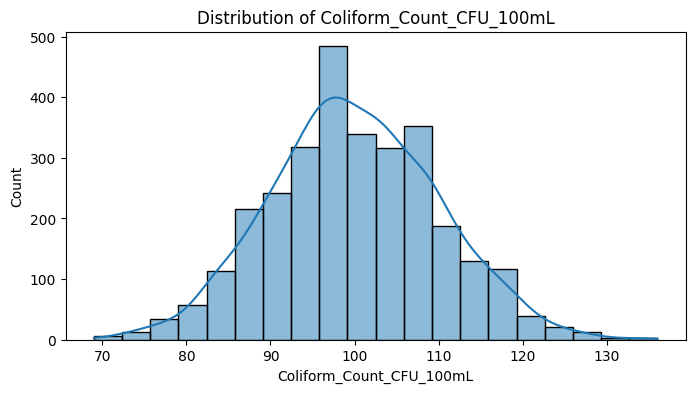

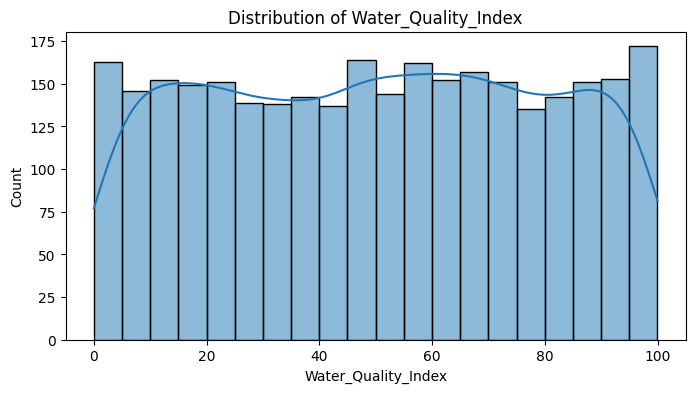

In [8]:
# Plot histograms for numerical variables
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()



## Check Outliers

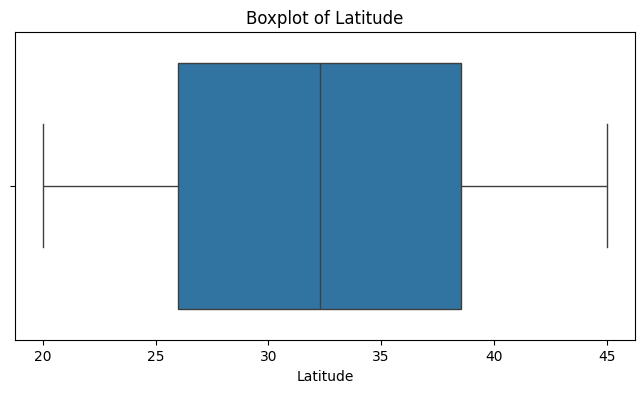

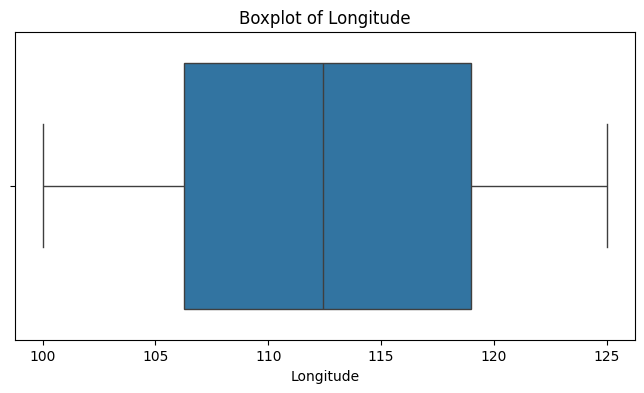

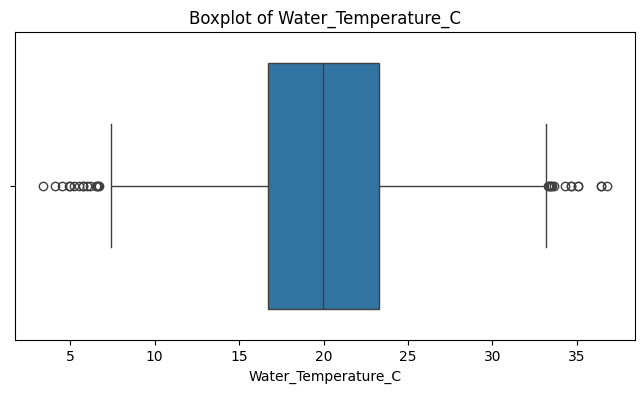

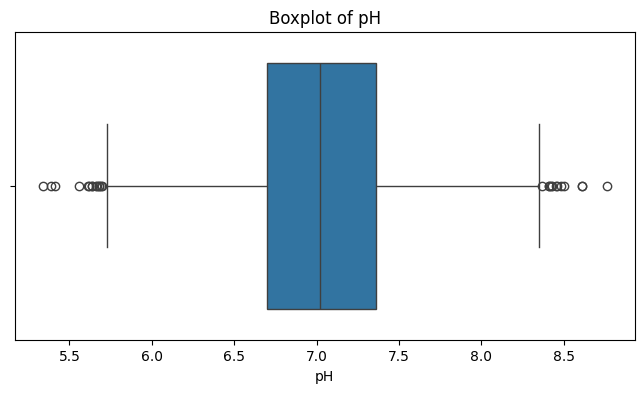

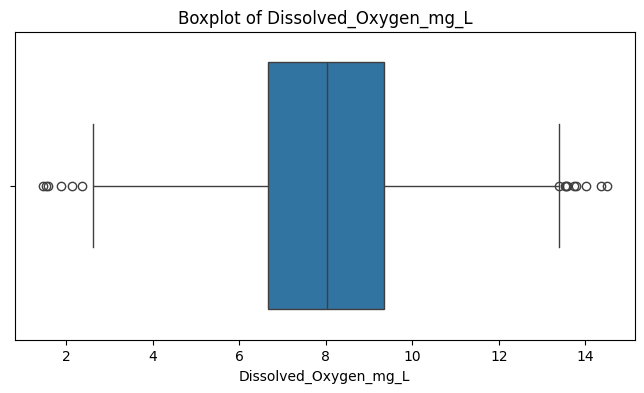

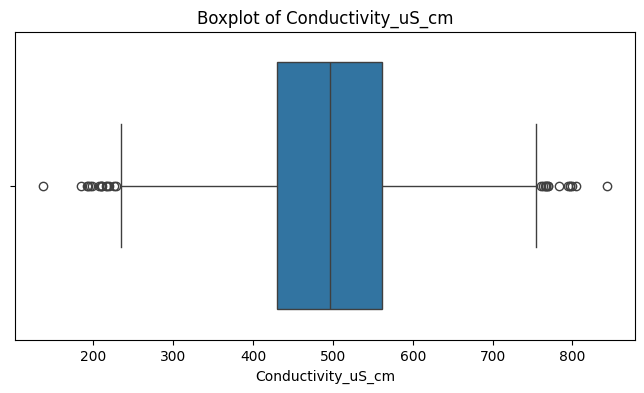

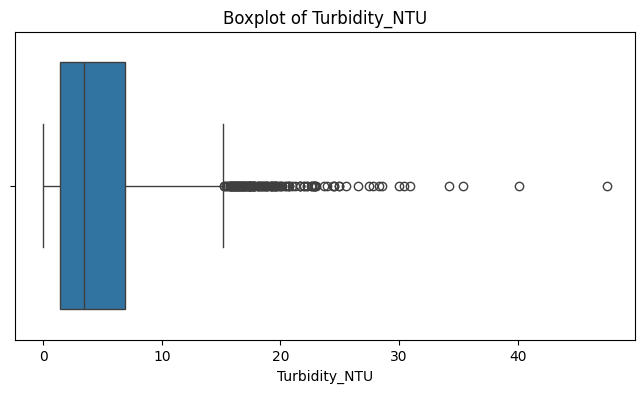

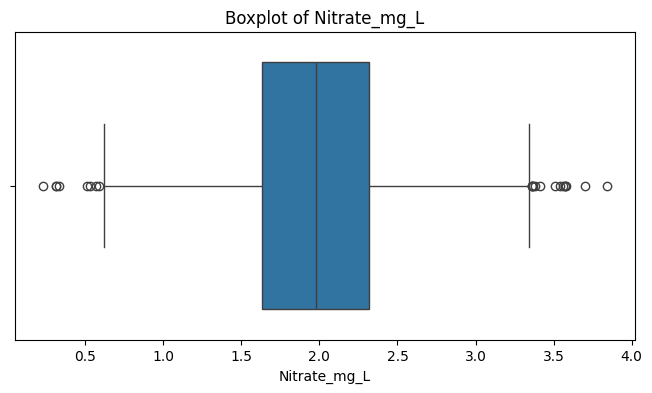

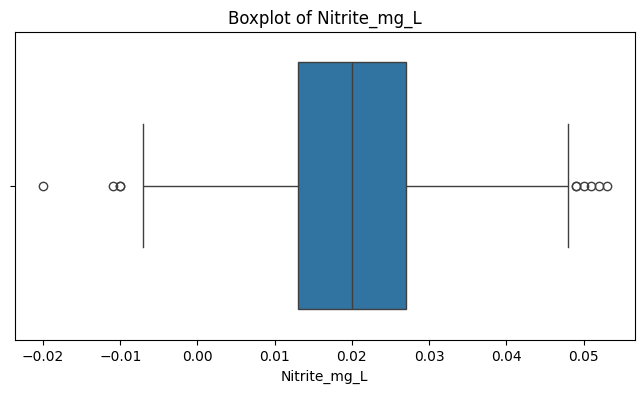

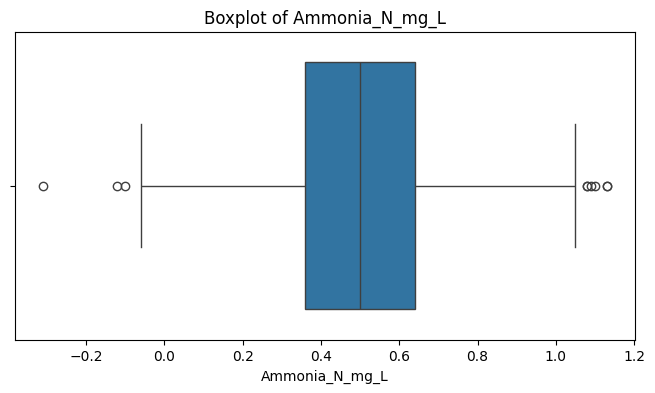

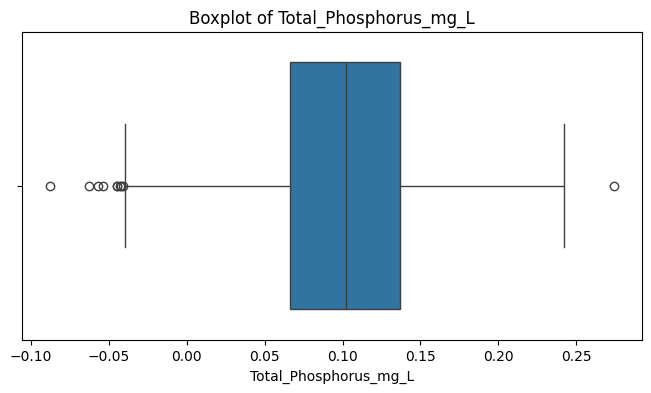

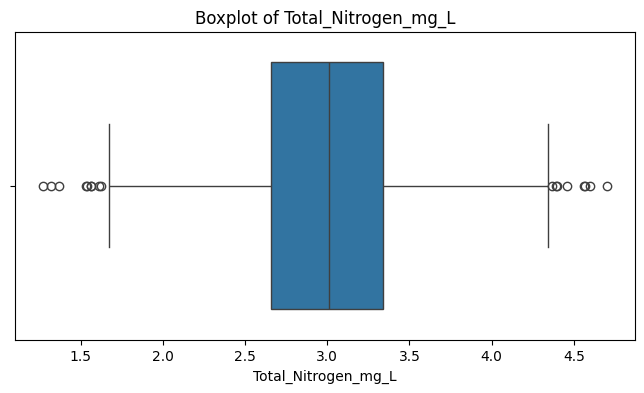

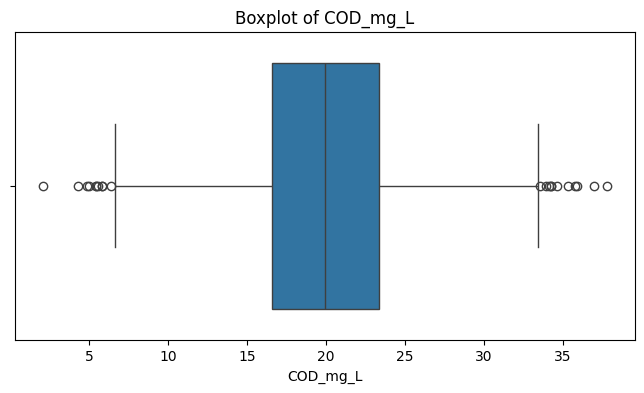

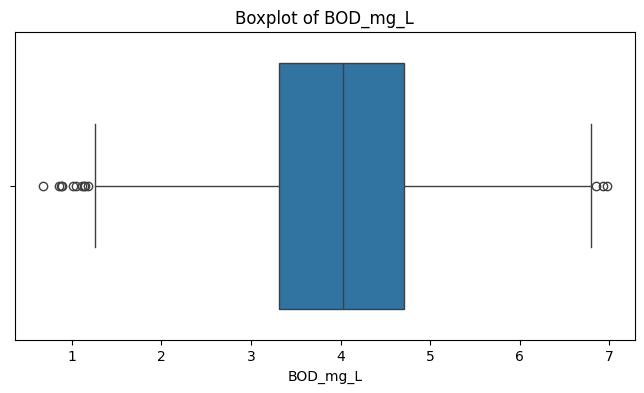

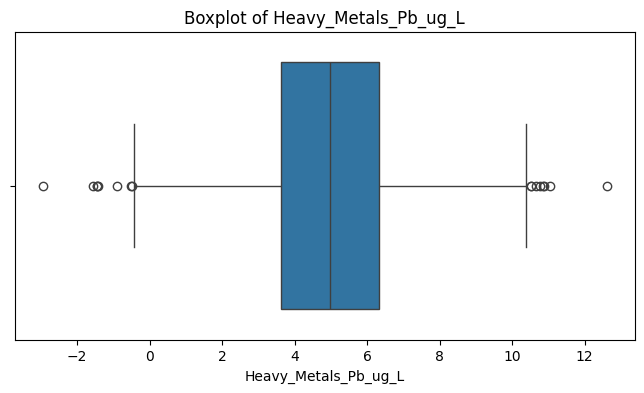

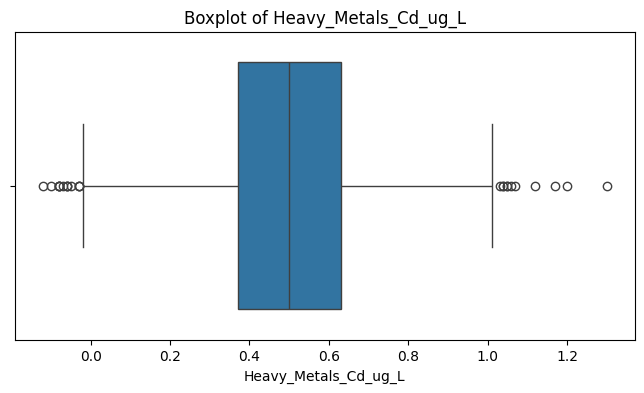

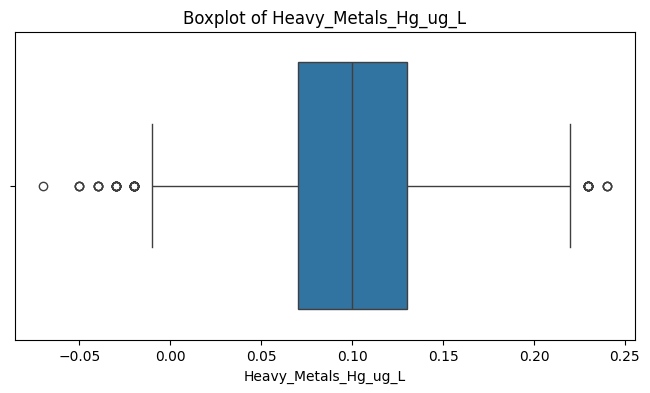

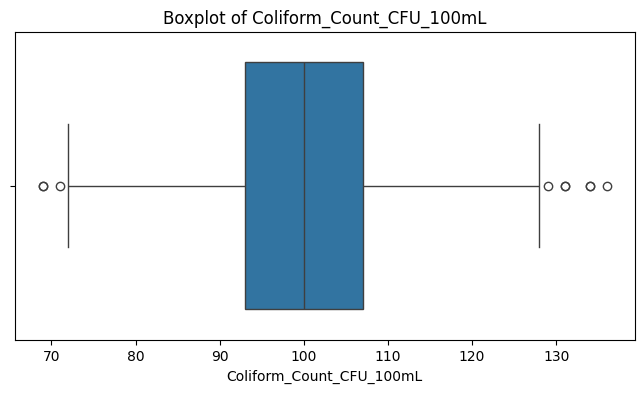

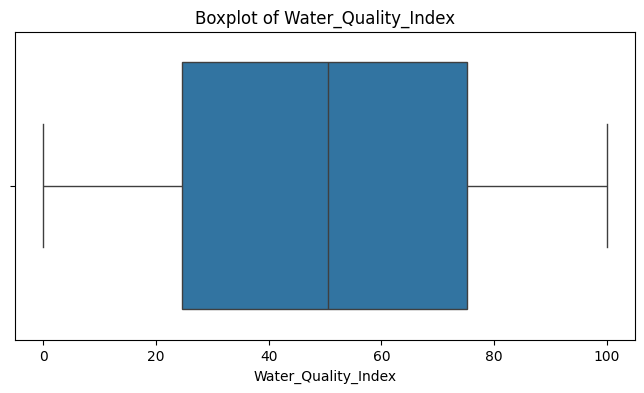

In [9]:
# Check outlier with boxplot on each columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

## Check Location & Date Columns

In [10]:
# Check Province
print(df['Province'].value_counts())

print("\n")

# Check City
print(df['City'].value_counts())

print("\n")

# Check Monitoring Station
print(df['Monitoring_Station'].value_counts())

Province
Shanghai     312
Sichuan      311
Zhejiang     304
Guangdong    301
Shandong     300
Beijing      299
Yunnan       296
Jiangsu      293
Hubei        292
Henan        292
Name: count, dtype: int64


City
Shanghai     312
Beijing      299
Chengdu      165
Jinan        160
Ningbo       156
Shenzhen     155
Zhengzhou    154
Wuhan        154
Nanjing      153
Kunming      152
Hangzhou     148
Mianyang     146
Guangzhou    146
Dali         144
Suzhou       140
Qingdao      140
Luoyang      138
Yichang      138
Name: count, dtype: int64


Monitoring_Station
Beijing_Station_7     42
Shanghai_Station_4    39
Shanghai_Station_2    39
Beijing_Station_9     38
Shanghai_Station_1    34
                      ..
Mianyang_Station_9     9
Suzhou_Station_5       9
Yichang_Station_10     8
Nanjing_Station_1      8
Yichang_Station_8      5
Name: count, Length: 180, dtype: int64


In [12]:
# Extract time component
df_dates = df.copy()
df_dates['Date'] = pd.to_datetime(df_dates['Date'])
df_dates['year'] = df_dates['Date'].dt.year
df_dates['month'] = df_dates['Date'].dt.month
df_dates['day'] = df_dates['Date'].dt.day

<Axes: title={'center': 'Data Frequencies per Year'}, xlabel='year'>

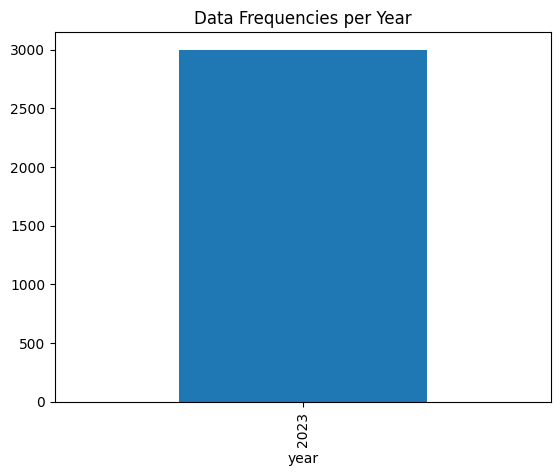

In [41]:
# Visualization of year
df_dates['year'].value_counts().sort_index().plot(kind='bar', title='Data Frequencies per Year')

<Axes: title={'center': 'Data Frequencies per Month'}, xlabel='month'>

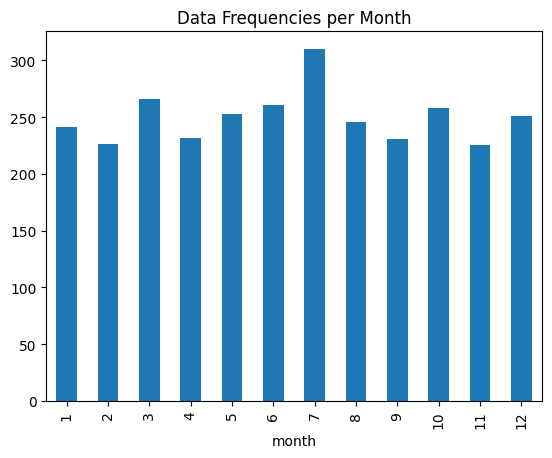

In [42]:
df_dates['month'].value_counts().sort_index().plot(kind='bar', title='Data Frequencies per Month')

<Axes: title={'center': 'Data Frequencies per Day'}, xlabel='day'>

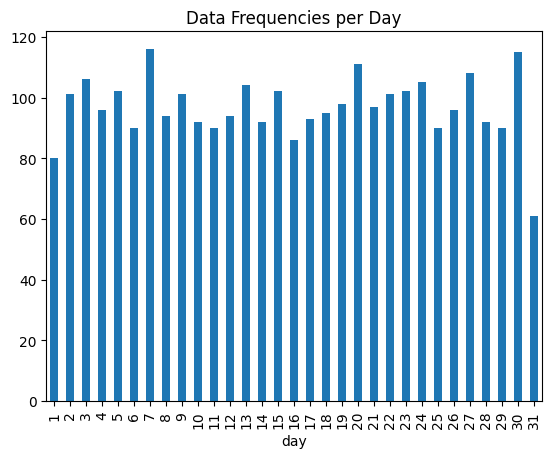

In [43]:
df_dates['day'].value_counts().sort_index().plot(kind='bar', title='Data Frequencies per Day')

## Check Categorical Columns



In [30]:
# Check Pollution Level
print("Values in Pollution Level:", df['Pollution_Level'].unique())
print(df['Pollution_Level'].value_counts())

Values in Pollution Level: ['Very Poor' 'Excellent' 'Poor' 'Moderate' 'Good']
Pollution_Level
Good         622
Very Poor    609
Excellent    594
Moderate     588
Poor         587
Name: count, dtype: int64


<Axes: xlabel='Pollution_Level', ylabel='count'>

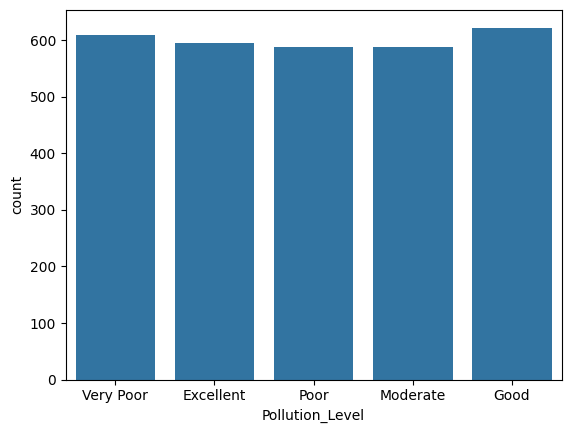

In [31]:
sns.countplot(x='Pollution_Level', data=df)

In [34]:
# Check Remarks
print("Values in Remarks:", df['Remarks'].unique())
print(df['Remarks'].value_counts())

Values in Remarks: ['High pollution spike detected' 'Monitoring recommended' nan
 'Requires attention']
Remarks
High pollution spike detected    780
Monitoring recommended           745
Requires attention               723
Name: count, dtype: int64


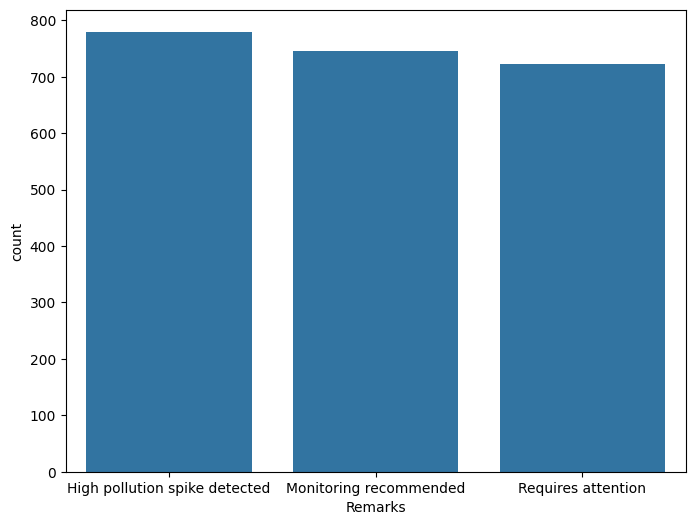

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Remarks', data=df)
plt.show()

# Multivariate Analysis

## Show Correlation

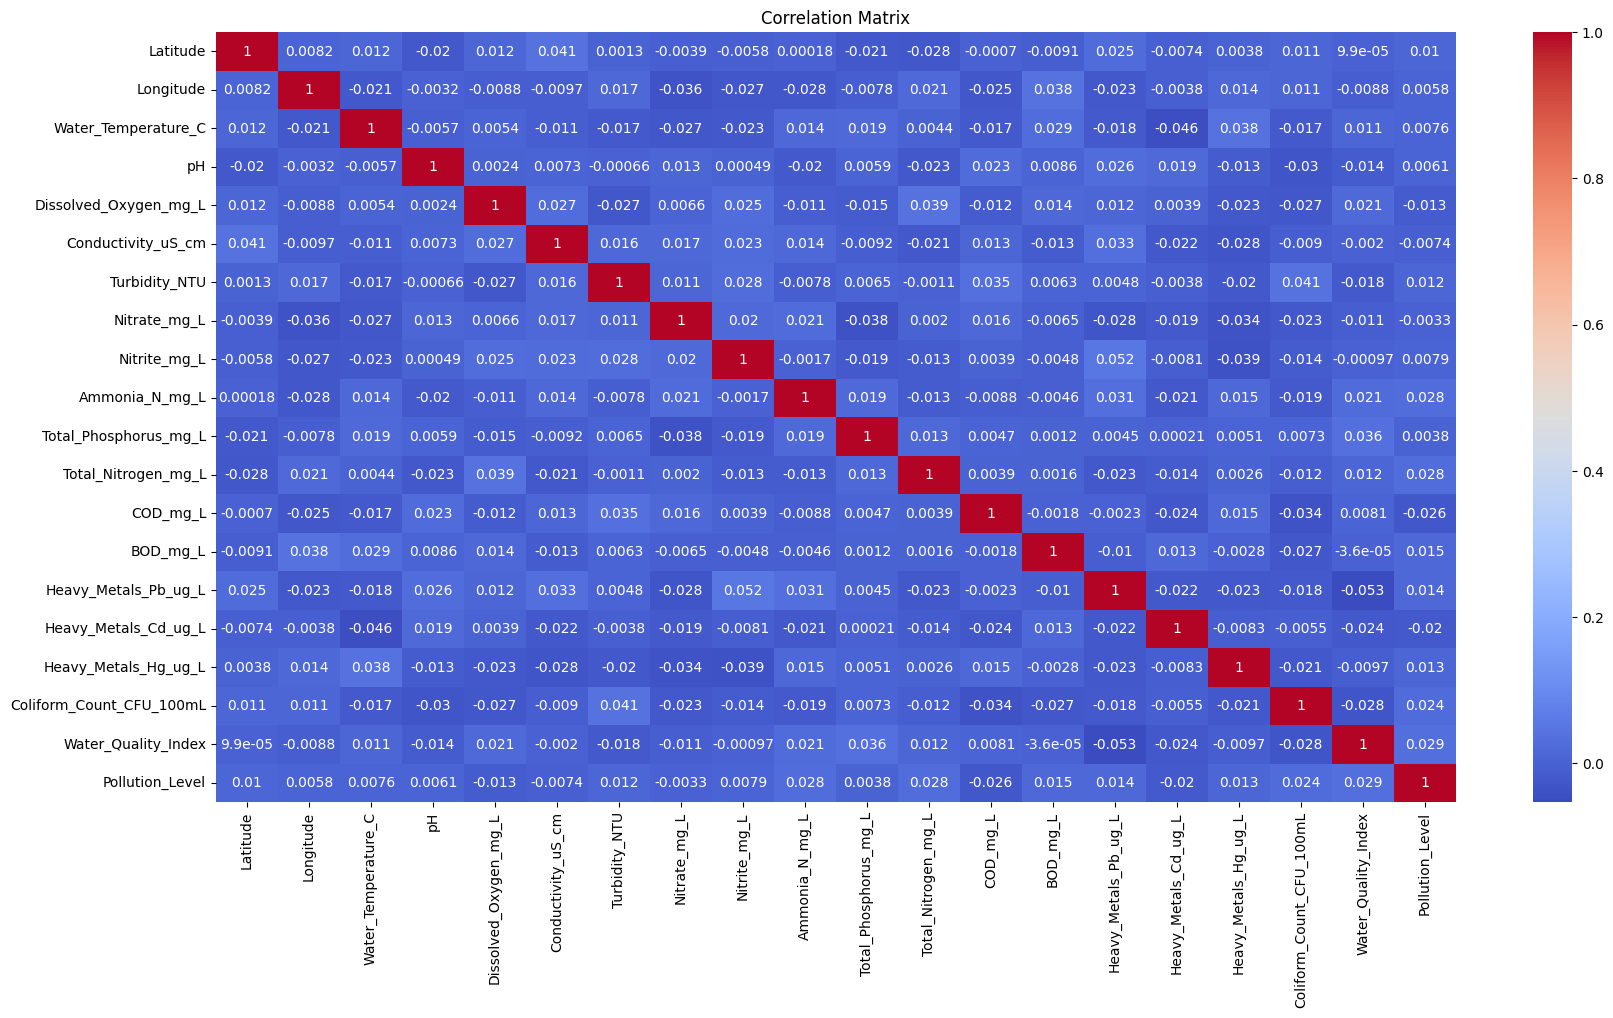

In [29]:
# Make duplicate of dataset
df_corr = df.copy()
df_corr.drop(['Province', 'City', 'Monitoring_Station', 'Date', 'Remarks'], axis=1, inplace=True)

# Encode 'Pollution Level' Column
df_corr['Pollution_Level'] = df_corr['Pollution_Level'].map({'Very Poor': 0 , 'Poor': 1, 'Moderate': 2, 'Good': 3, 'Excellent': 4})

# Show correlation
corr_matrix = df_corr.corr(method='spearman')
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

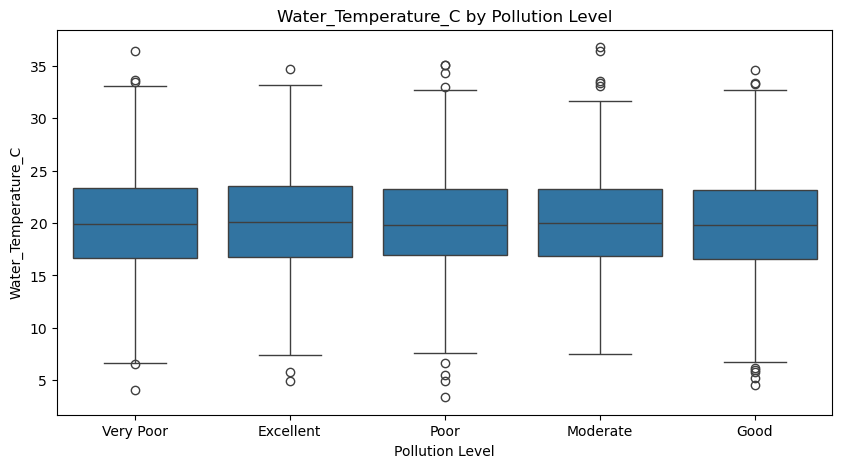

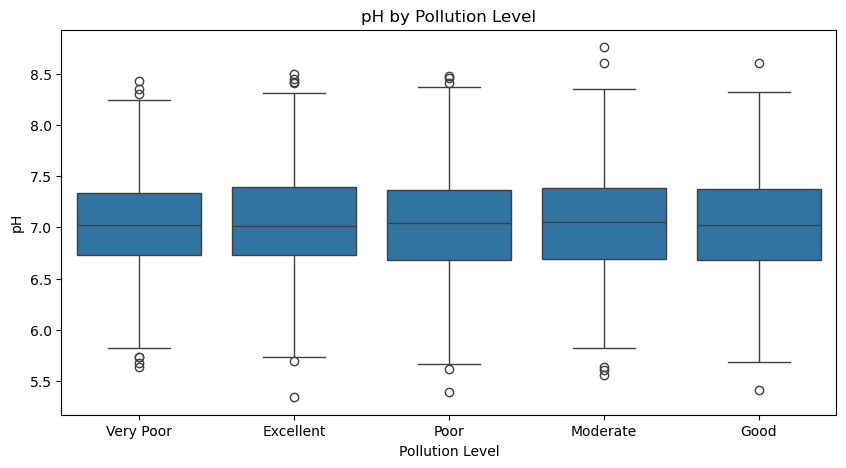

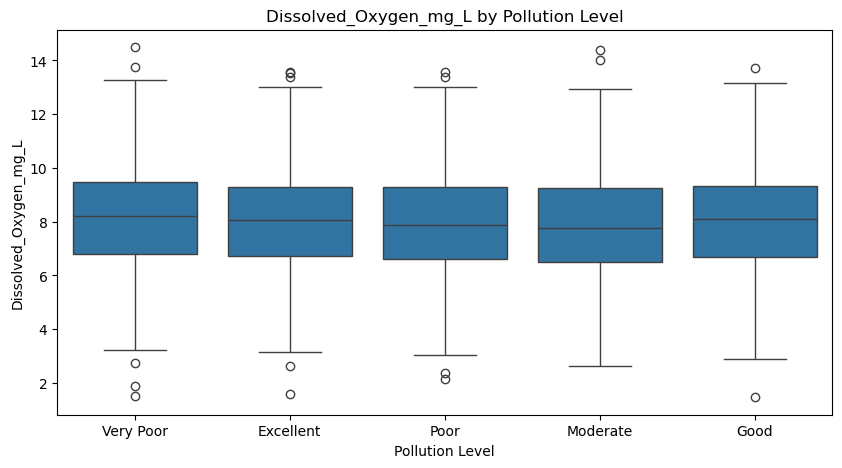

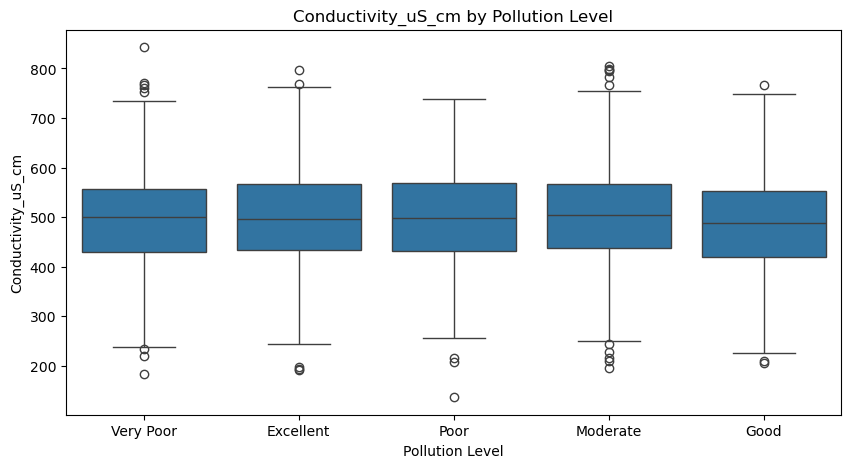

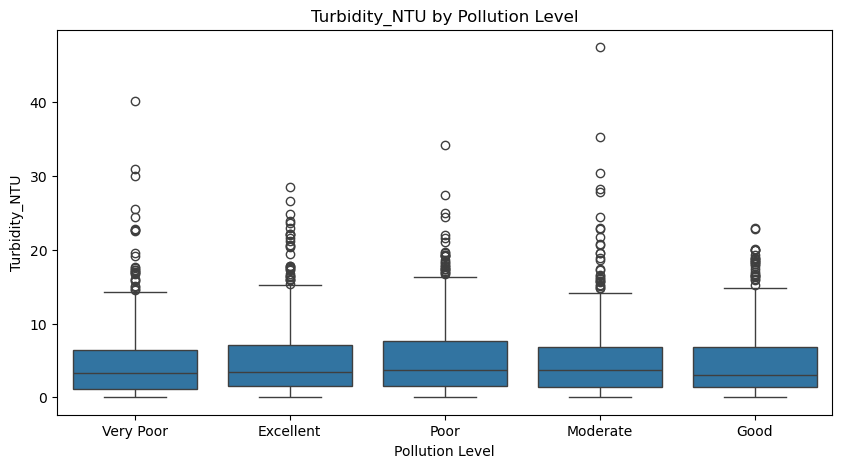

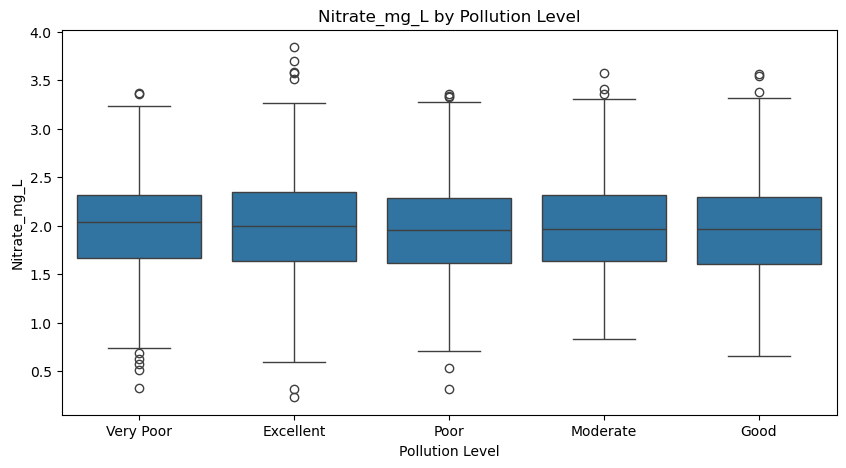

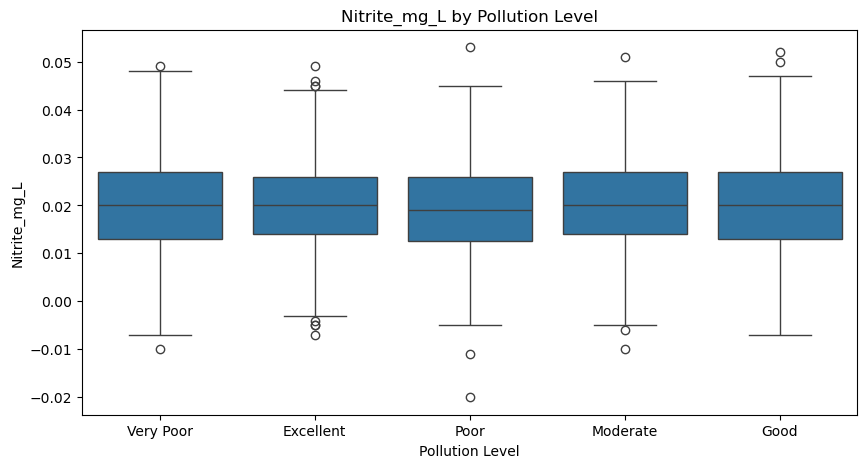

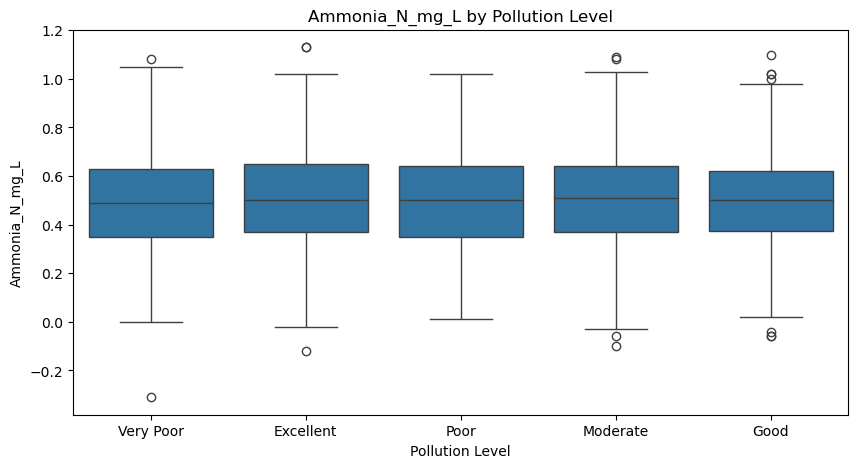

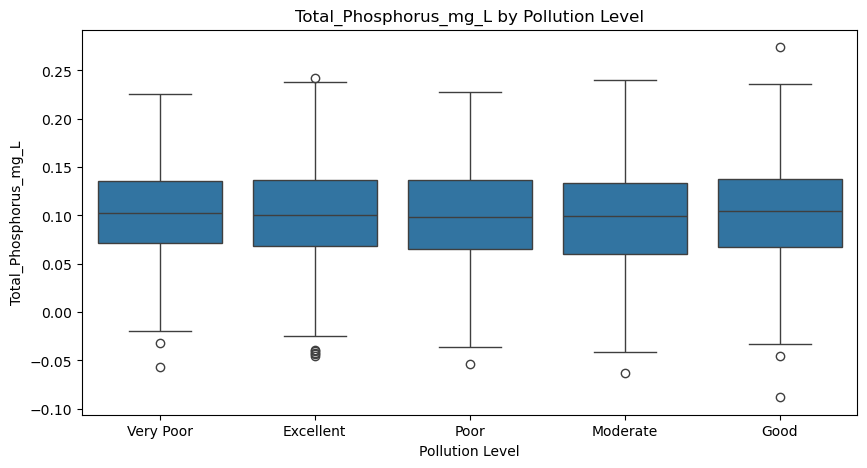

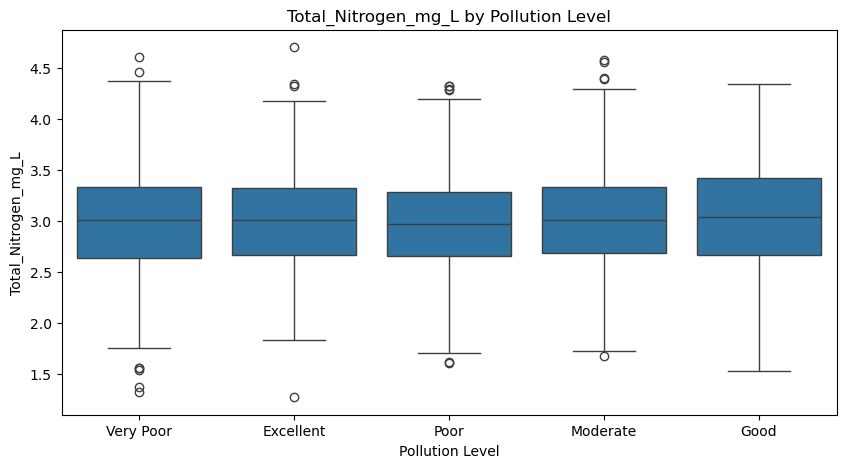

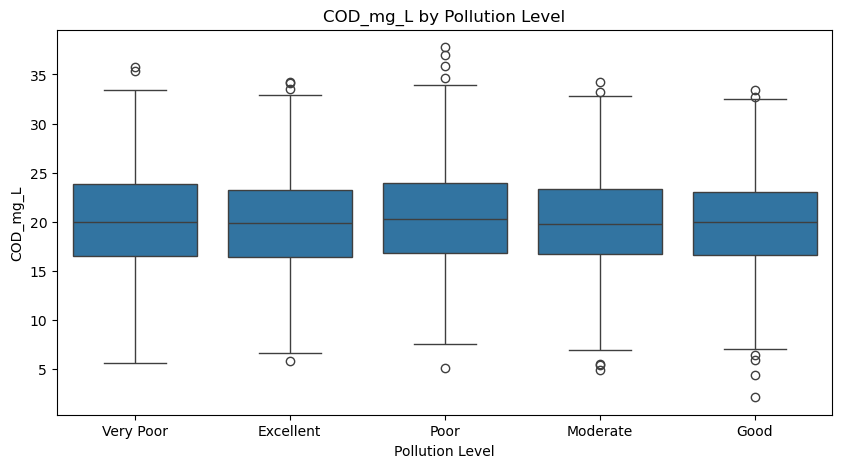

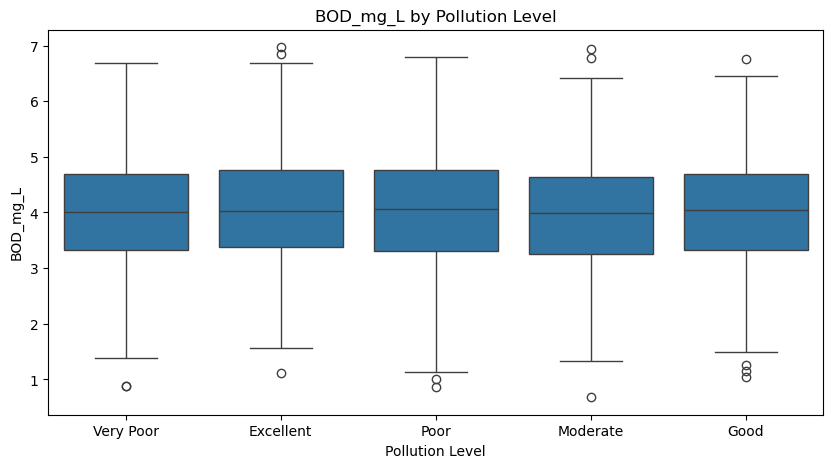

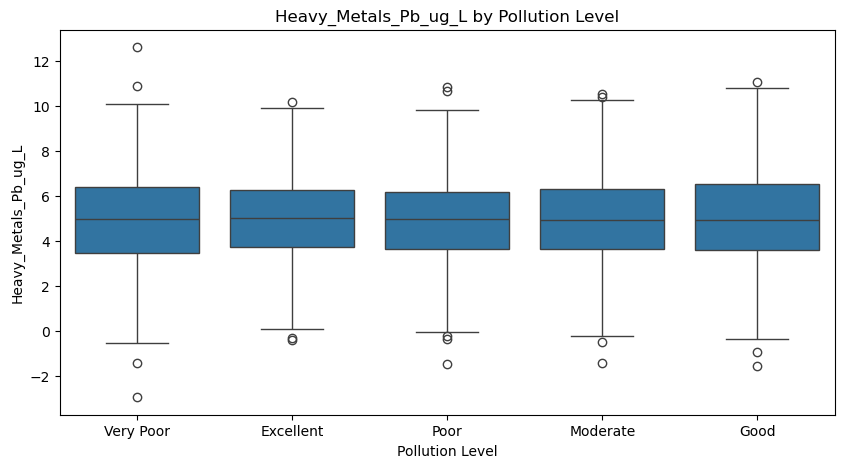

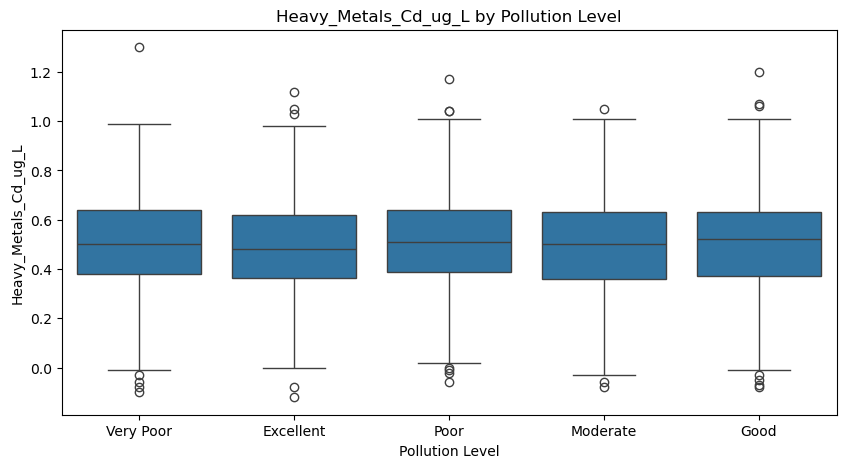

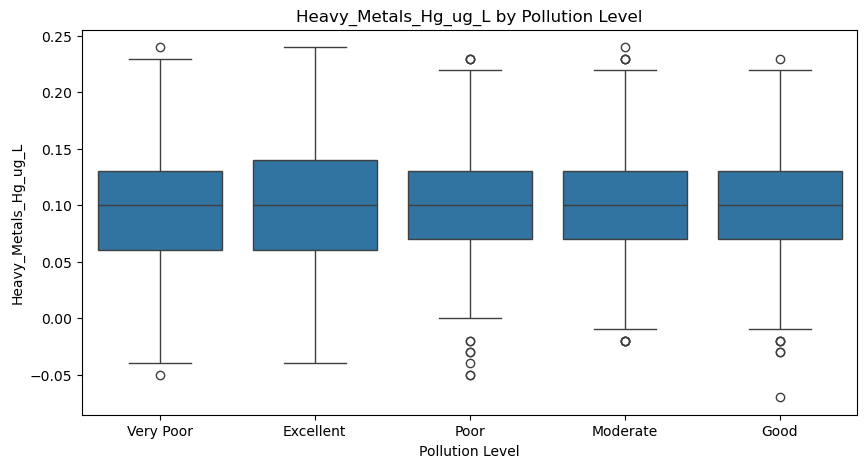

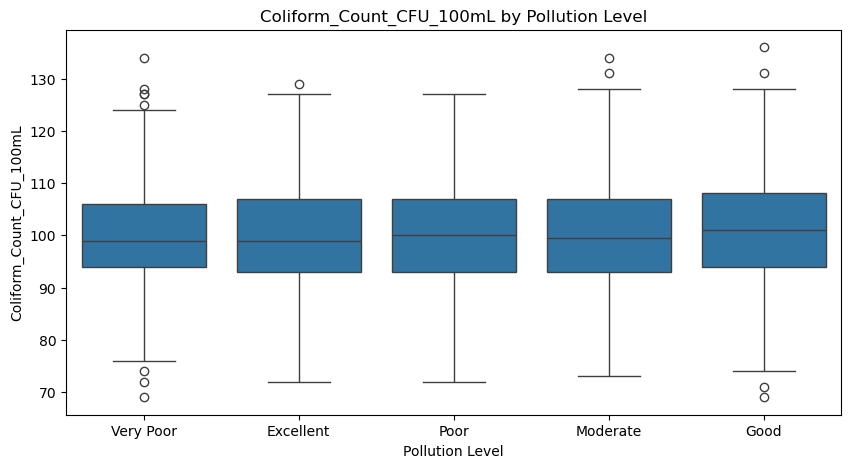

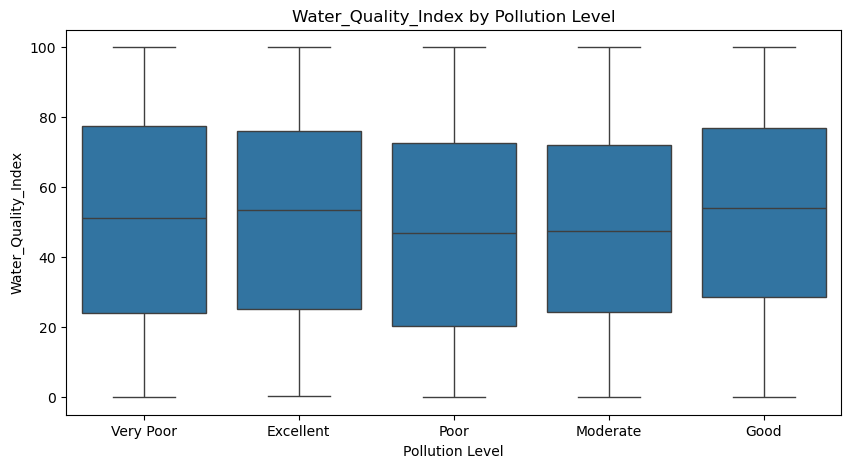

In [22]:
# Boxplots of numerical variables grouped by Pollution_Level
num_cols = [
    'Water_Temperature_C', 'pH', 'Dissolved_Oxygen_mg_L', 'Conductivity_uS_cm',
    'Turbidity_NTU', 'Nitrate_mg_L', 'Nitrite_mg_L', 'Ammonia_N_mg_L',
    'Total_Phosphorus_mg_L', 'Total_Nitrogen_mg_L', 'COD_mg_L', 'BOD_mg_L',
    'Heavy_Metals_Pb_ug_L', 'Heavy_Metals_Cd_ug_L', 'Heavy_Metals_Hg_ug_L',
    'Coliform_Count_CFU_100mL', 'Water_Quality_Index'
]
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Pollution_Level', y=col, data=df)
    plt.title(f'{col} by Pollution Level')
    plt.xlabel('Pollution Level')
    plt.ylabel(col)
    plt.show()